# Imports

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Fetch

In [4]:
def process_cell(data):
    if '\n' in data:
        data = data.replace('\n', '')
    return float(data)

def read_from_files(path, file_list):
    y=[]
    X=[]
    for file in file_list:
        with open(path+'/'+file) as f:
            read_lines = f.readlines()
            for i in range(len(read_lines)):
                line = list(map(process_cell, read_lines[i].split(',')))
                X.append(line[1:])
                y.append(int(line[0]))
            f.close()
    return X,y
    
def get_decade_year(years, is_decade_onehot=True):
    #Decades: 0s (2000s), 10s (2010s), 20s (1920s), 30s, 40s, 50s, 60s, 70s, 80s, 90s - 10d onehot
    #Years 0-9 (not onehot encoded)
    rez_y = []
    rez_d = []
    year_enc = {}
    for i in range(10):
        if is_decade_onehot:
            year_enc[i] = [0,0,0,0,0,0,0,0,0,0]
            year_enc[i][i] = 1
        else:
            year_enc[i] = i if i > 1 else i+10
    for y in years:
        dec_year = y % 100
        decade = dec_year // 10
        year = dec_year % 10
        rez_y.append(year)
        rez_d.append(year_enc[decade])
    return rez_d, rez_y

In [5]:
files = ['data_1.txt', 'data_2.txt', 'data_3.txt', 'data_4.txt', 'data_5.txt']
path = './data'
X, y = read_from_files(path, files)

In [6]:
train_len = 463715
X_train, y_train = np.array(X[:train_len]), np.array(y[:train_len])
X_test, y_test = np.array(X[train_len:]), np.array(y[train_len:])

In [7]:
y_train_decade, y_train_year = get_decade_year(y_train)
y_test_decade, y_test_year = get_decade_year(y_train)

In [8]:
#Scale
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Analysis

In [17]:
def plot_hist(data, axes, i, j, bins, color,title = None):
    m = np.mean(data)
    v = np.var(data)
    sns.histplot(data = data, bins = bins, ax = axes[i,j], color=color, legend=False)
    axes[i,j].axvline(m, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {m:.2f}')
    axes[i,j].axvline(m - np.sqrt(v), color='green', linestyle='dashed', linewidth=2, label=f'-1 SD')
    axes[i,j].axvline(m + np.sqrt(v), color='green', linestyle='dashed', linewidth=2, label=f'+1 SD')

    if not title is None:
        axes[i,j].set_title(title)

def plot_scatter(X, y, axes, i, j, color, title = None):
    sns.scatterplot(x = X, y = y, ax = axes[i,j], color = color, legend = False, alpha=0.2)
    if not title is None:
        axes[i,j].set_title(title)

def plot_attribute_distribution(data):
    X_t = np.transpose(data)
    
    w = int(len(X_t)**0.5)
    h = len(X_t)//w
    if len(X_t)%w !=0:
        h+=1
    _, axes = plt.subplots(h, w, figsize = (30,30))
    for i in range(h):
        for j in range(w):
            ind = i*w + j
            plot_hist(X_t[ind], axes, i, j, 50, 'steelblue')
    plt.tight_layout()
    plt.show()


def plot_target_dependance(data, target, start, end):
    """Iscrtava zavisnost target atributa od svakog atributa u data"""
    X_t = np.transpose(data)
    size = min(end-start, len(X_t))
    w = int(size**0.5)
    h = size//w
    print(f"{w} x {h}")
    if size%w !=0:
        h+=1
    _, axes = plt.subplots(h, w, figsize = (10,10))
    for i in range(h):
        for j in range(w):
            ind = start + i * w + j
            if ind < start or ind>=end:
                continue
            plot_scatter(X_t[ind], target, axes, i, j, 'steelblue')
    plt.tight_layout()
    plt.show()


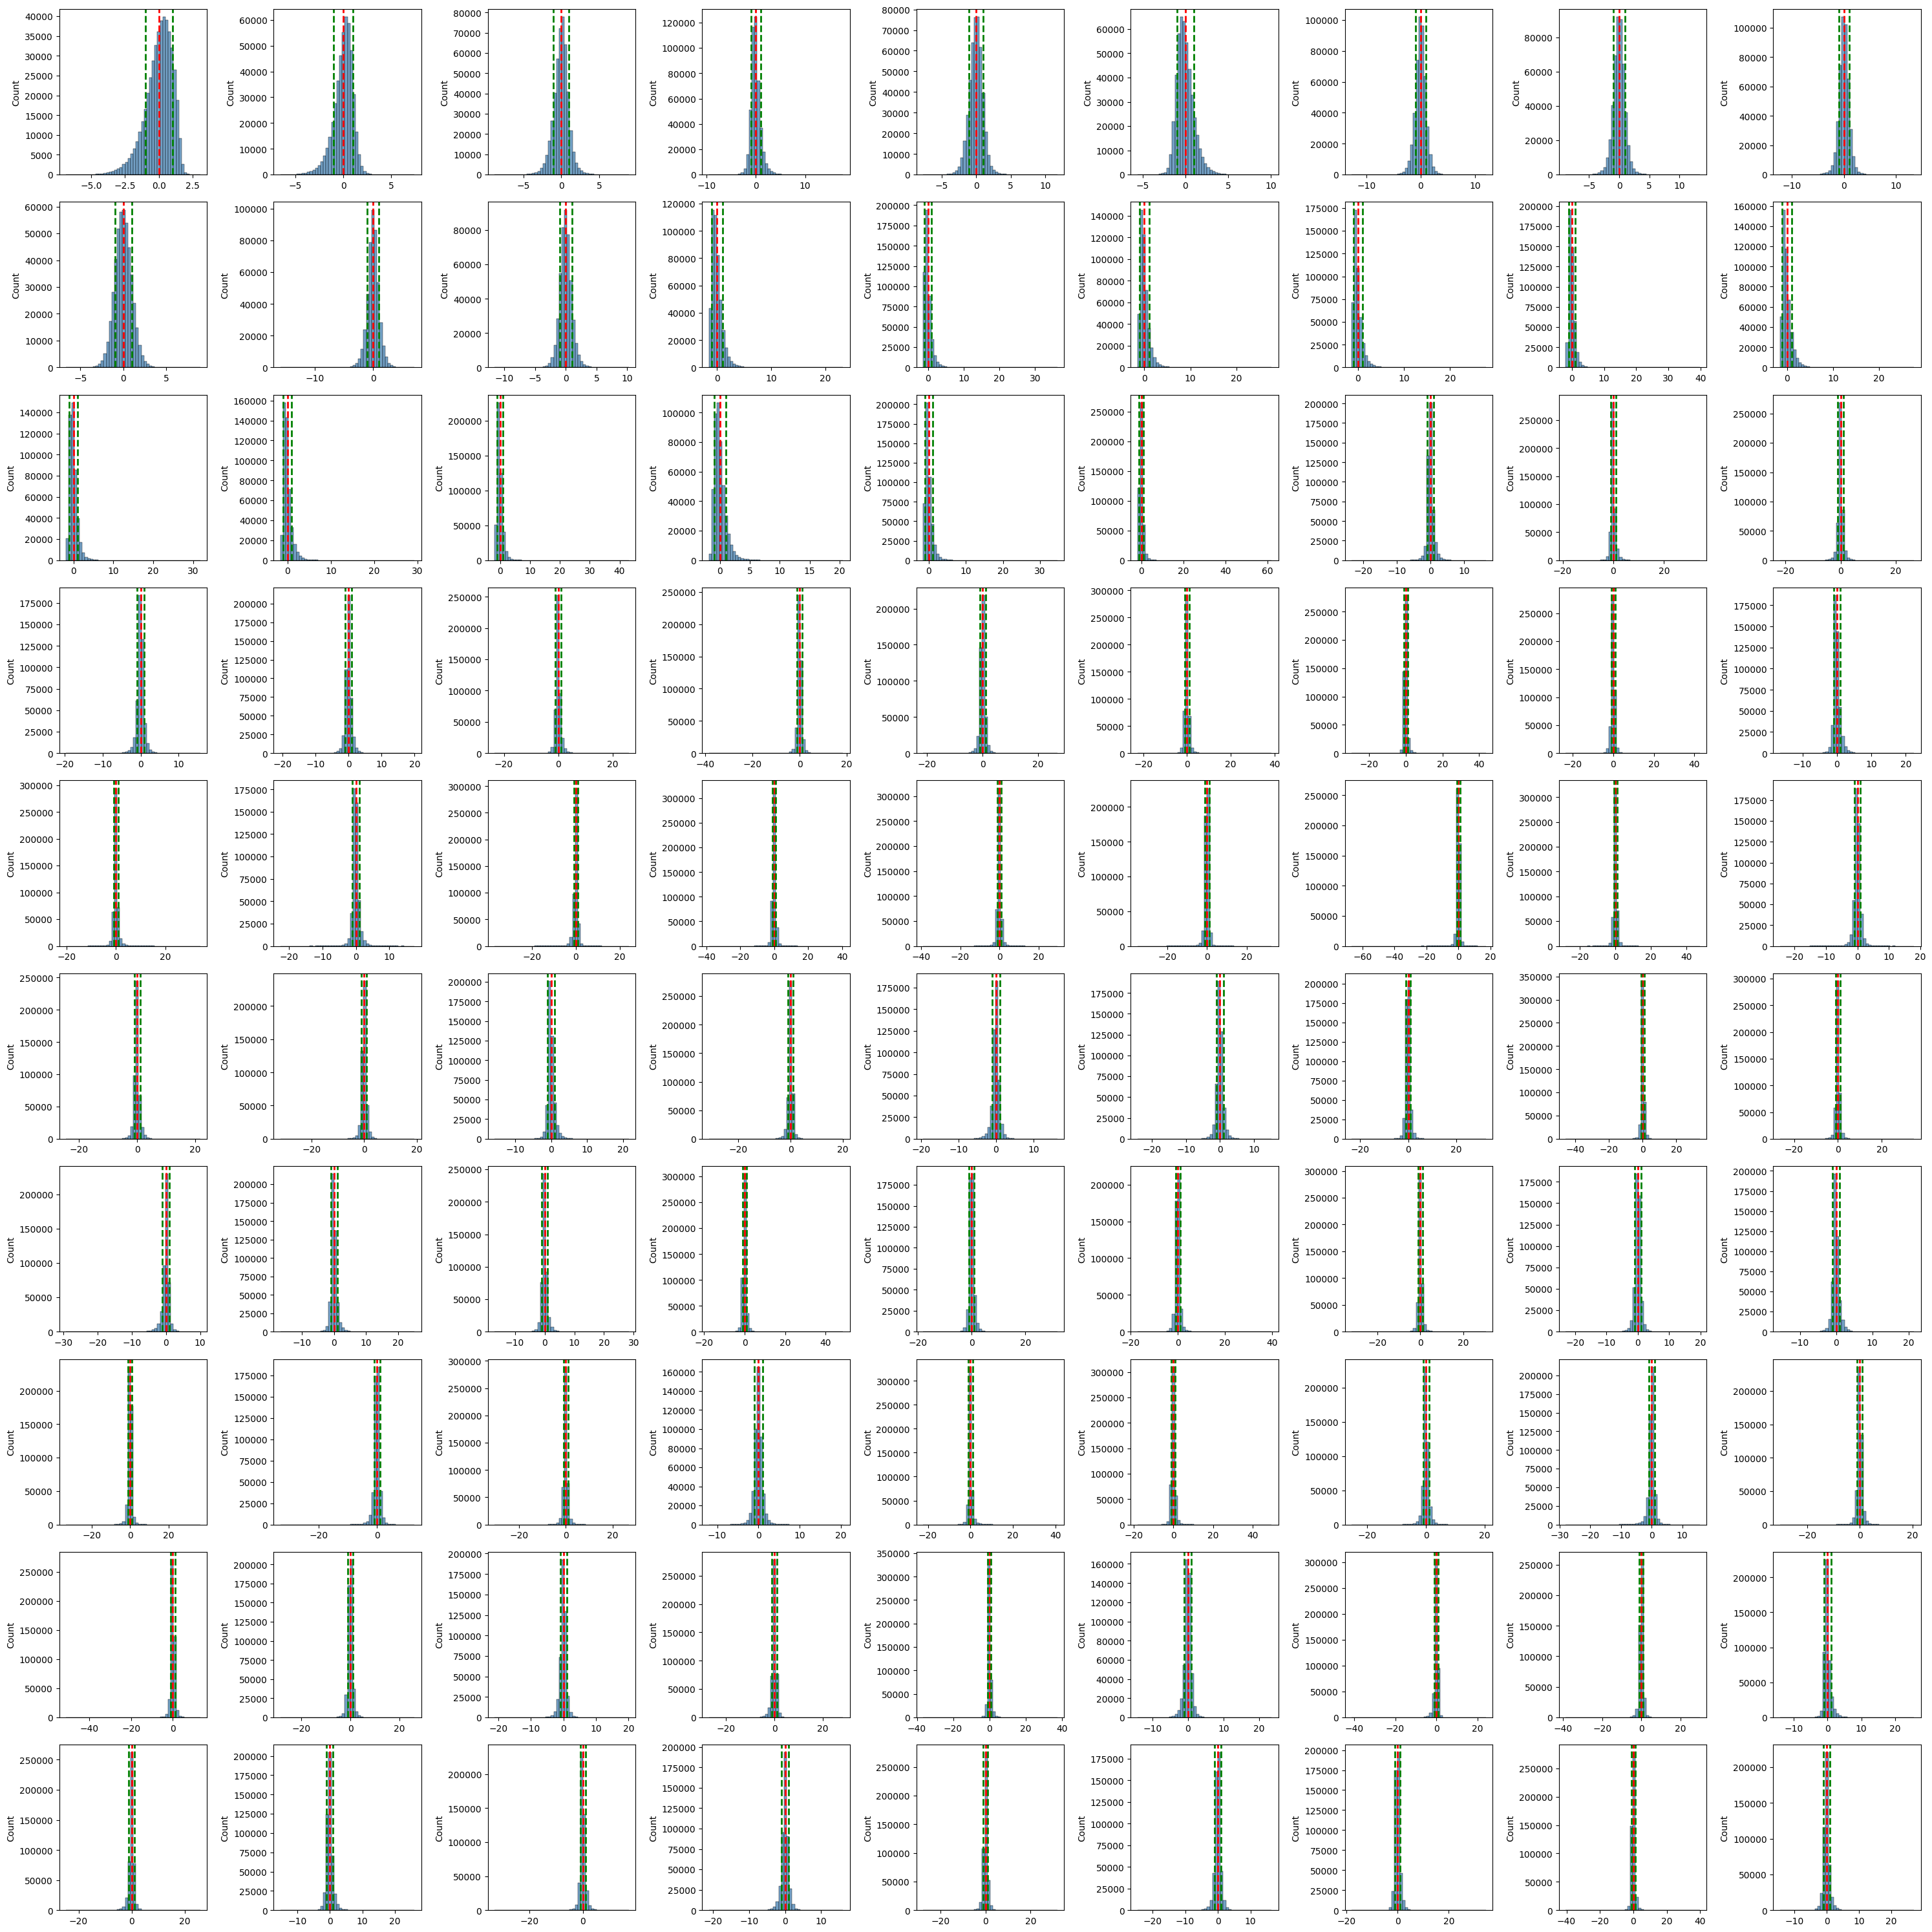

In [10]:
plot_attribute_distribution(X_train)

In [11]:
decade, _ = get_decade_year(y_train, is_decade_onehot=False)
decade = np.array(decade)

2 x 2


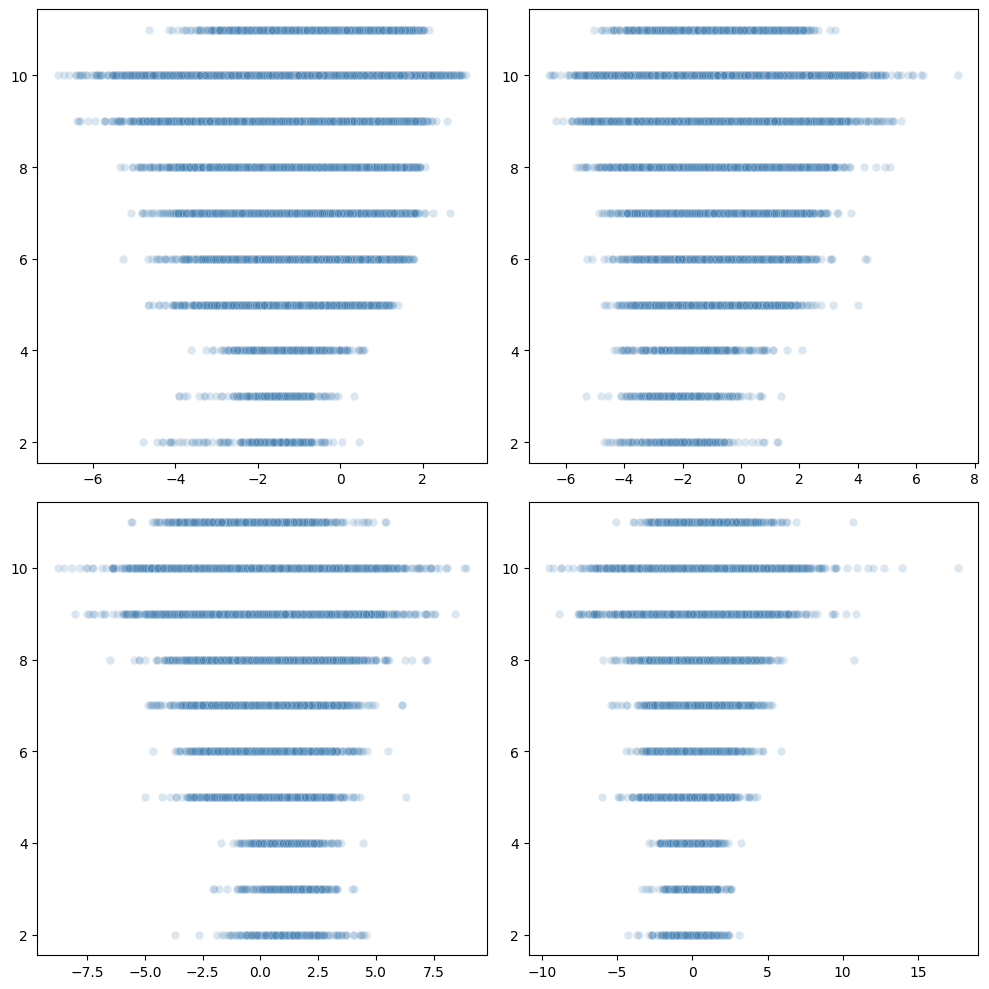

2 x 2


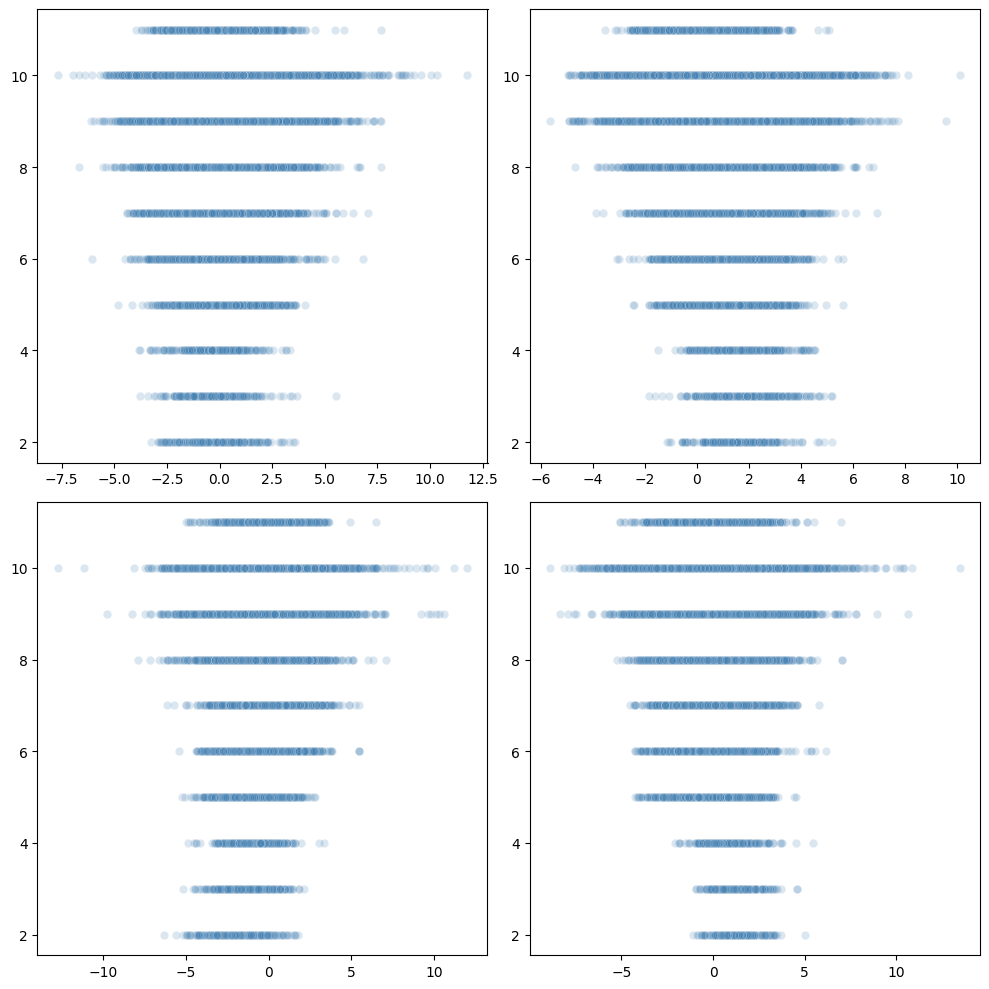

2 x 2


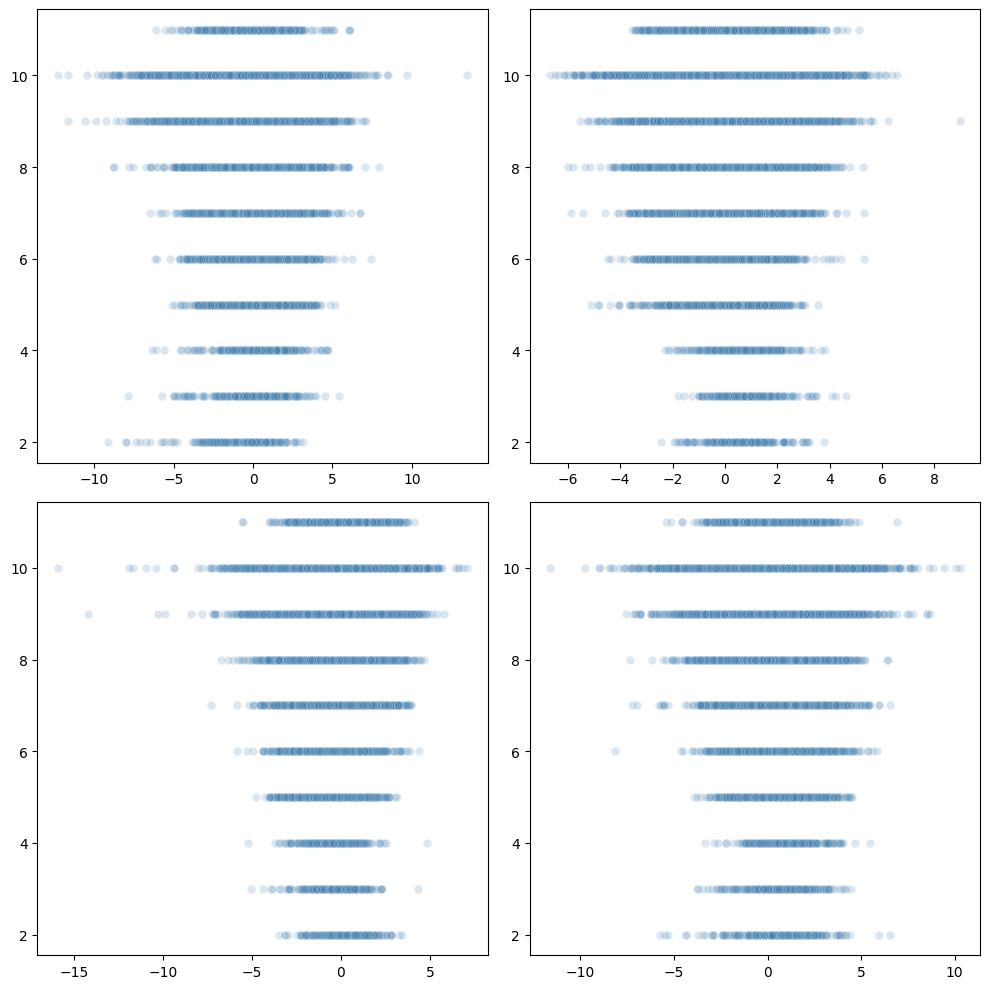

2 x 2


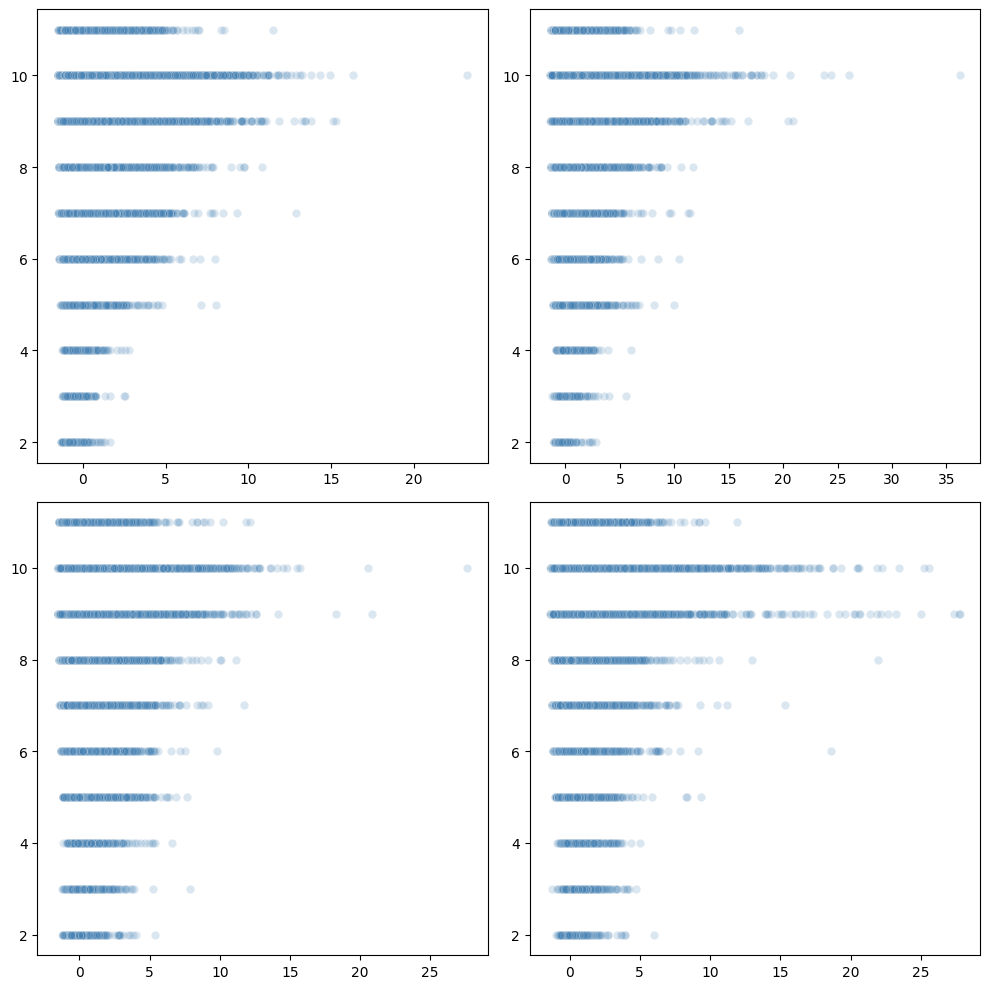

2 x 2


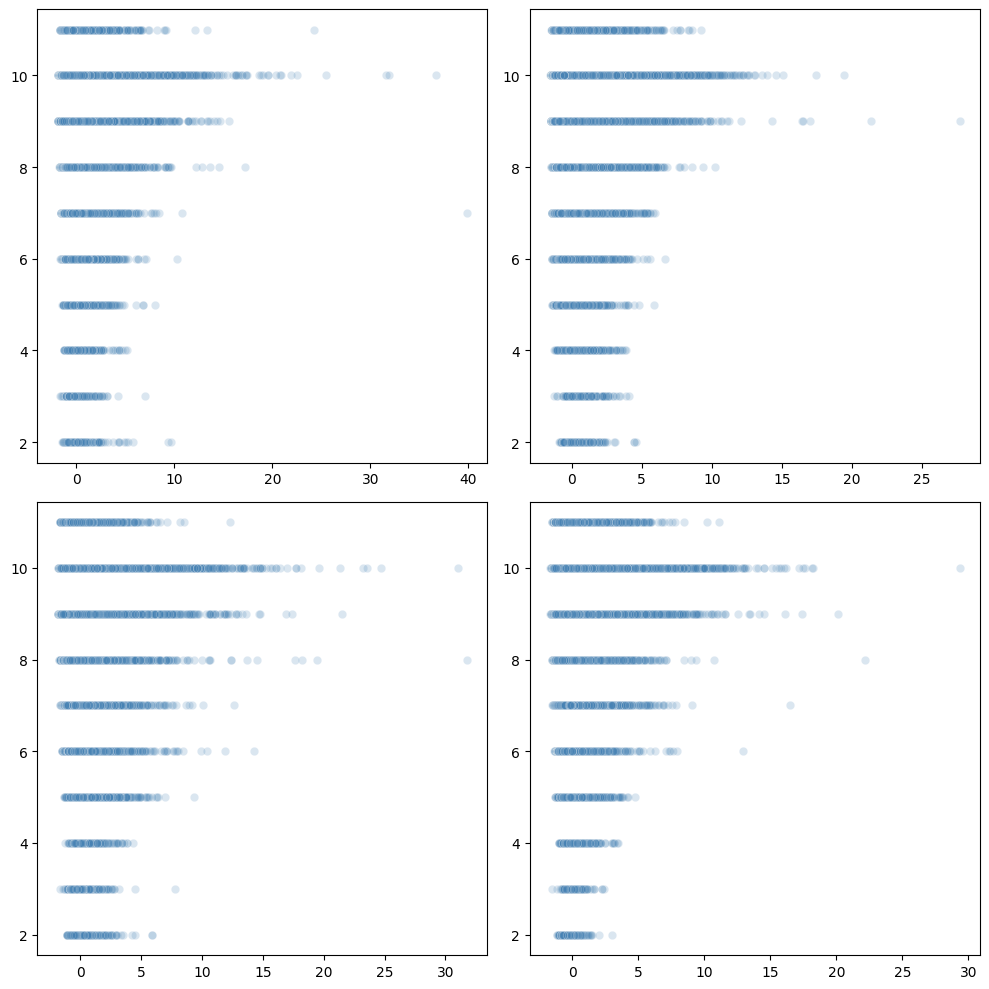

2 x 2


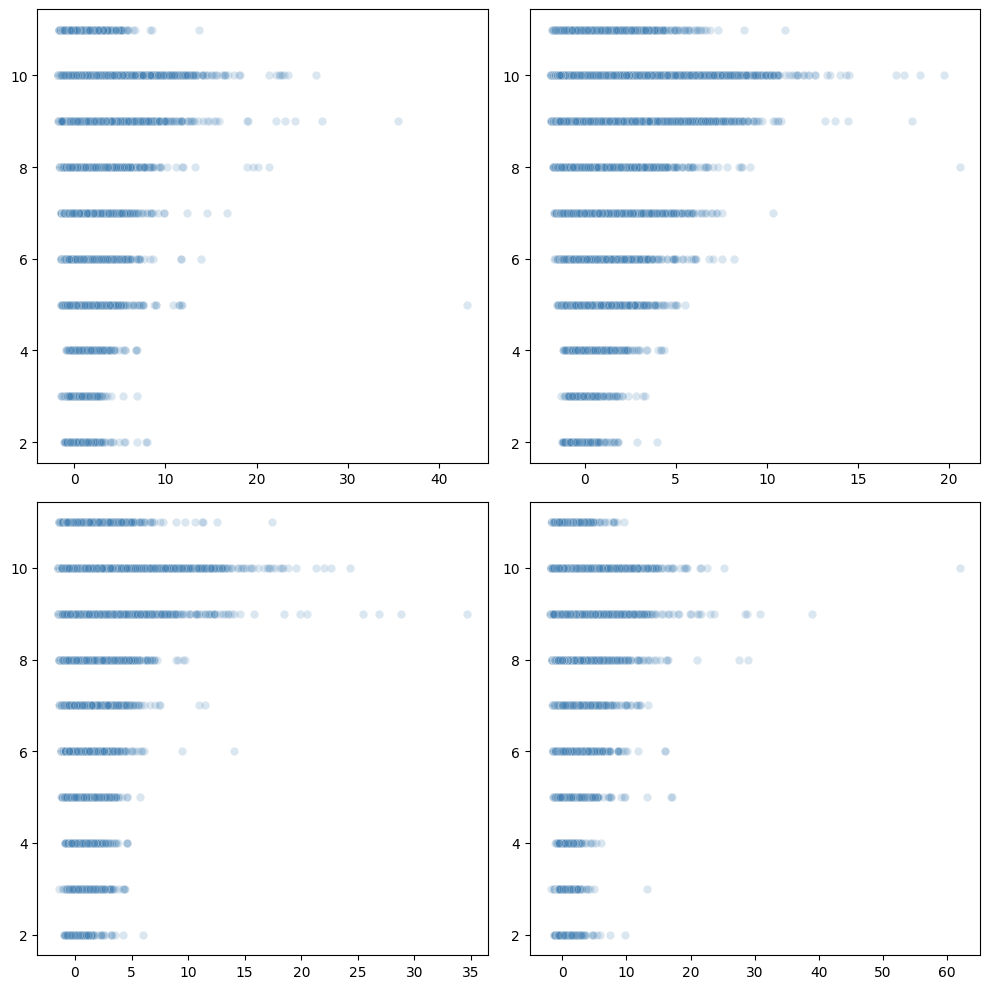

2 x 2


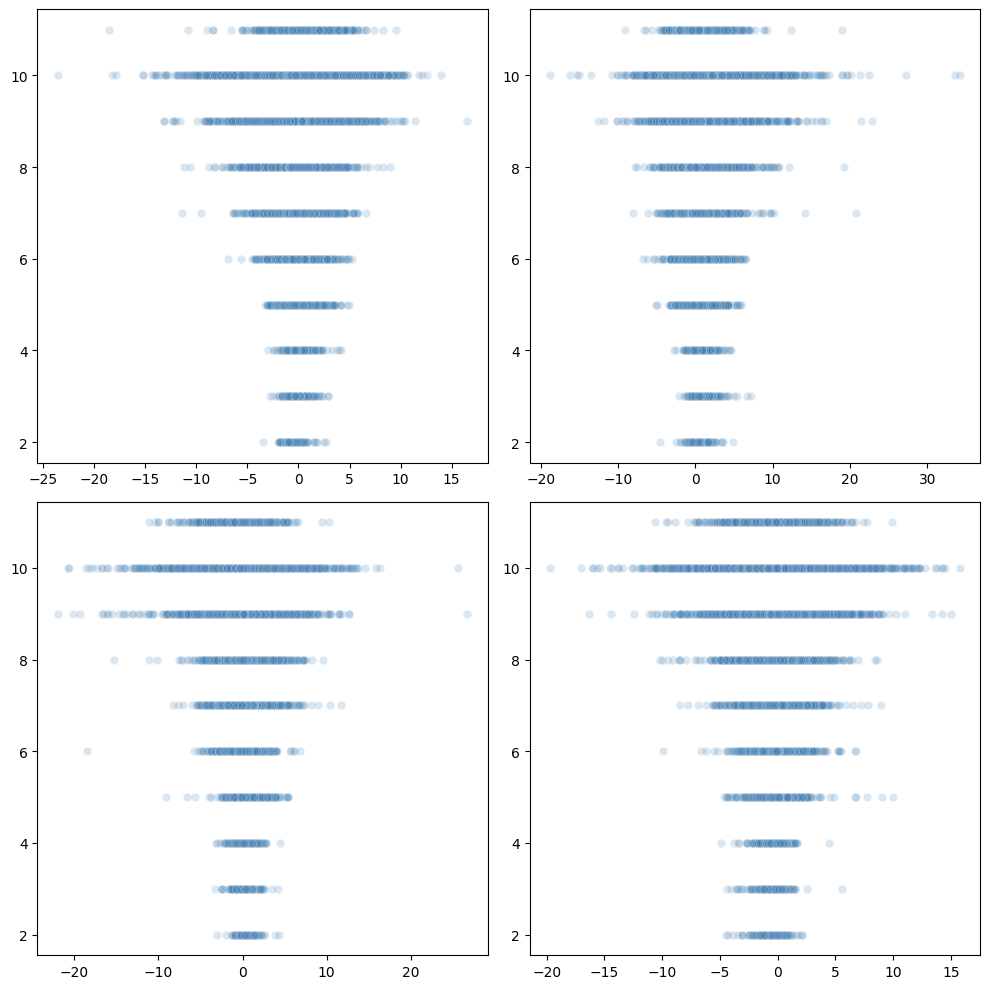

2 x 2


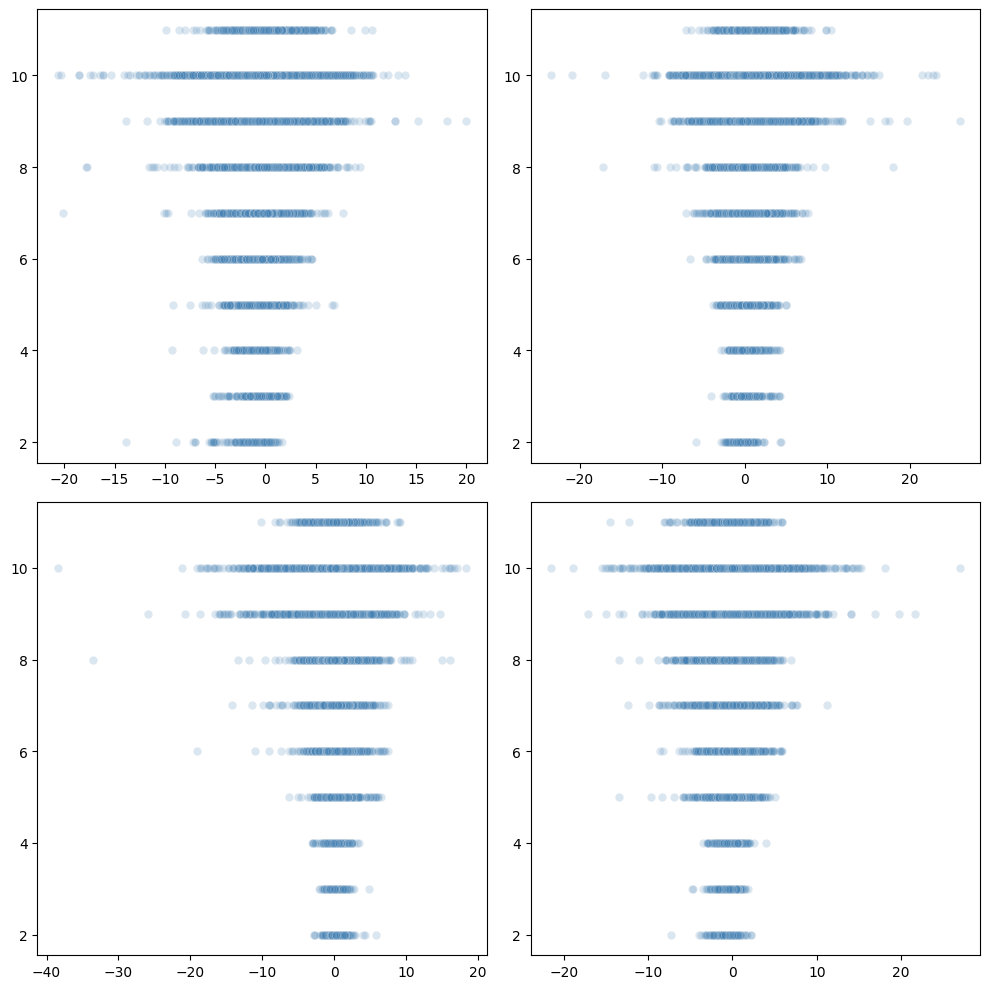

2 x 2


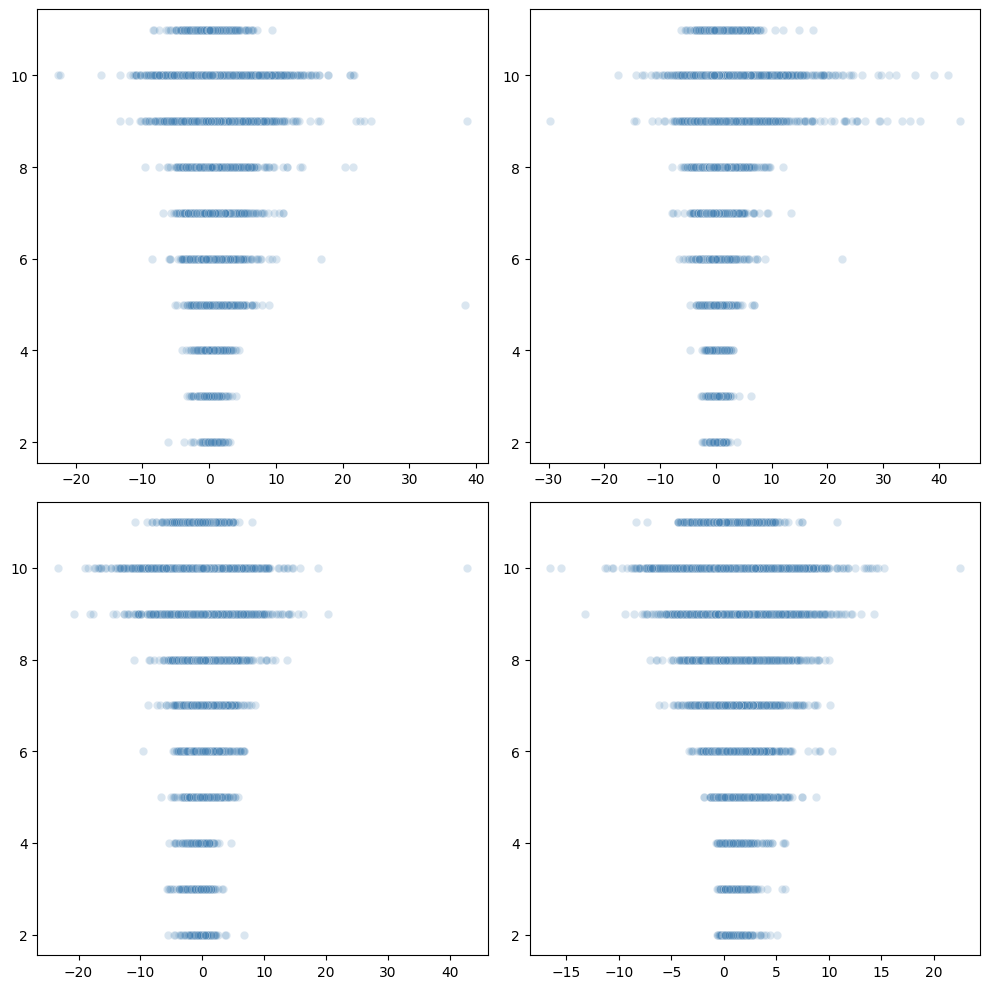

2 x 2


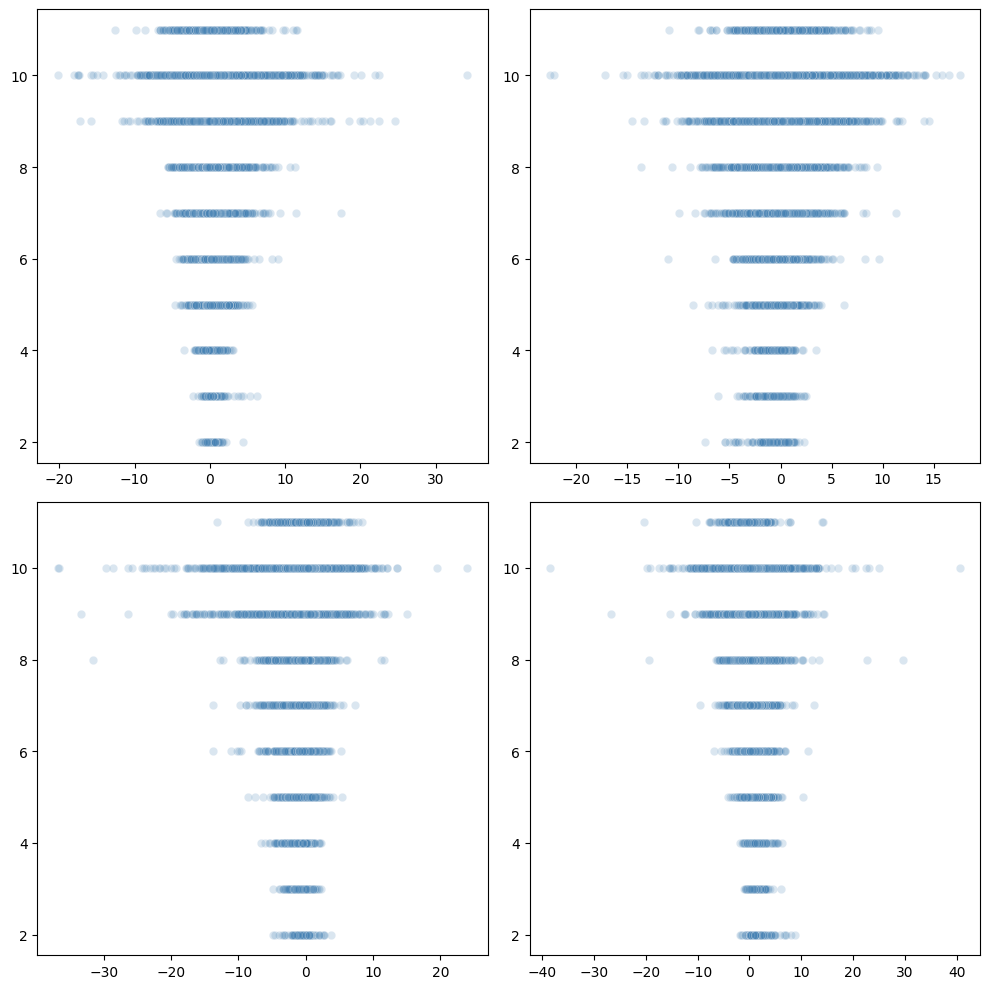

2 x 2


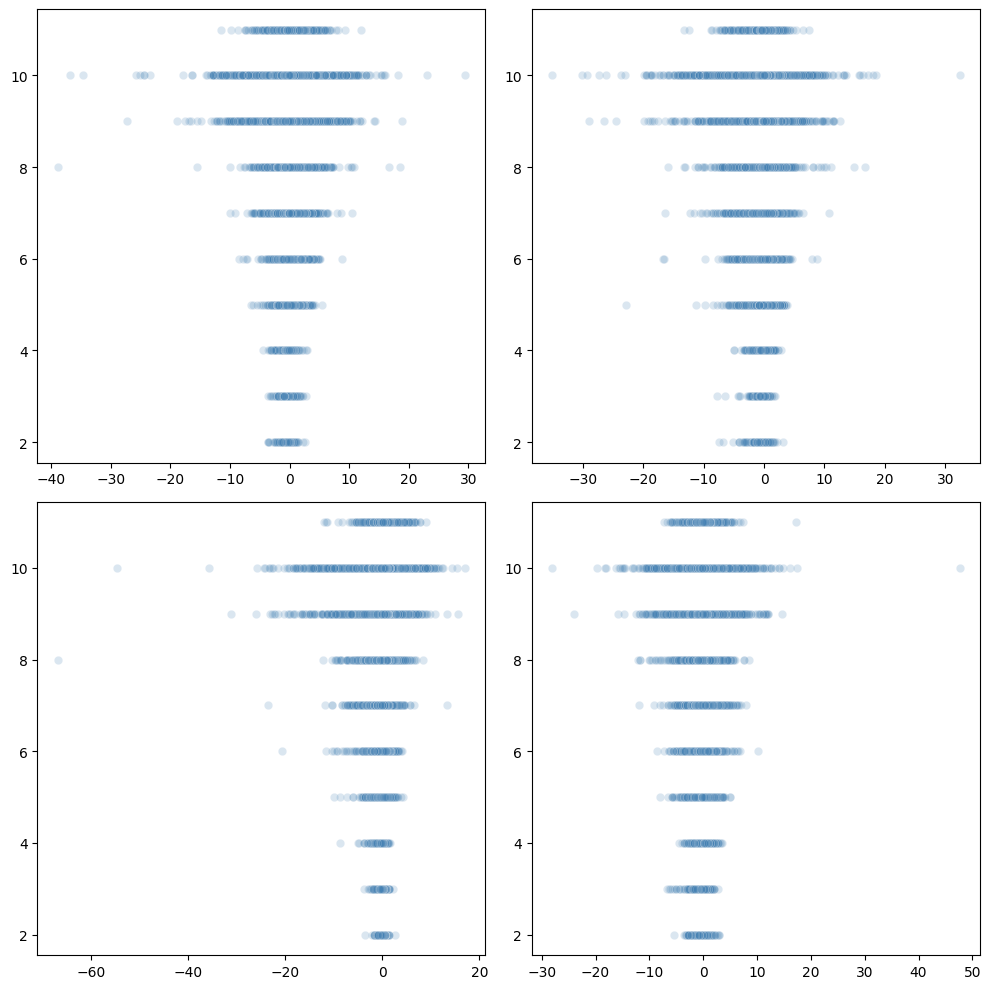

2 x 2


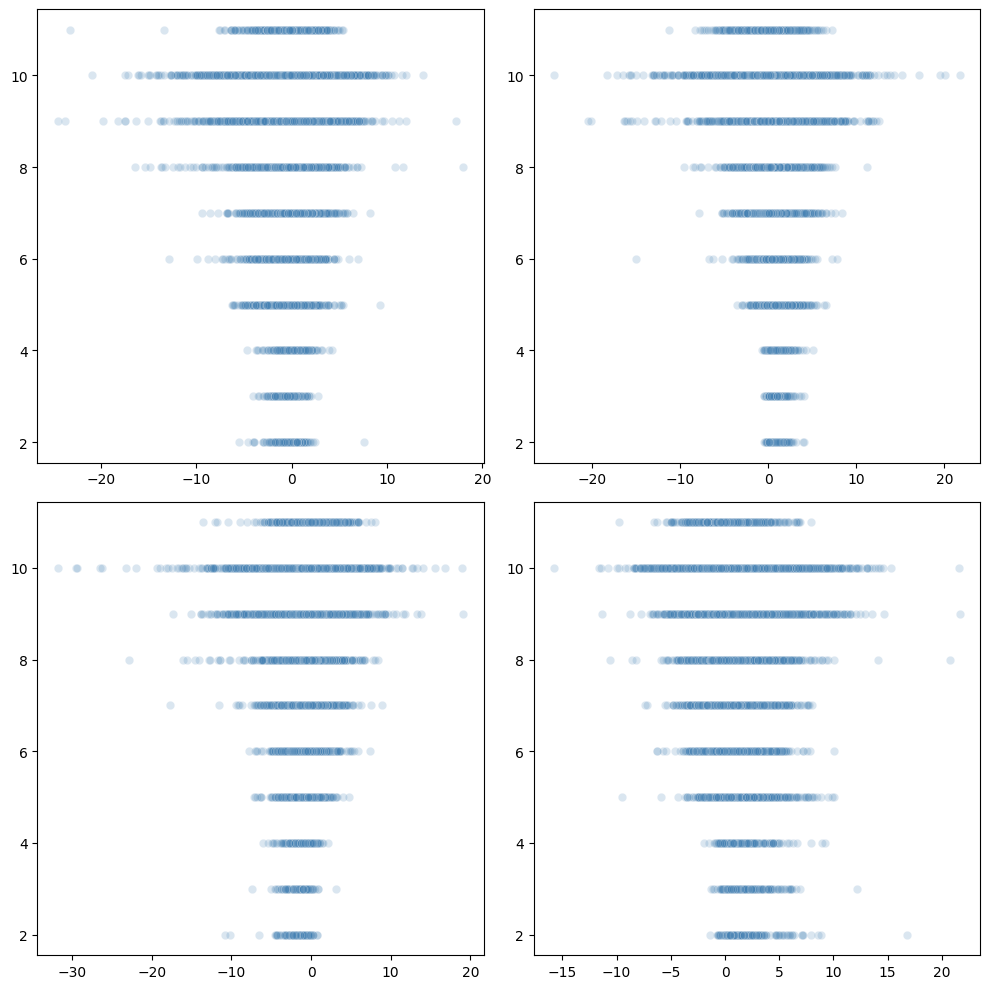

2 x 2


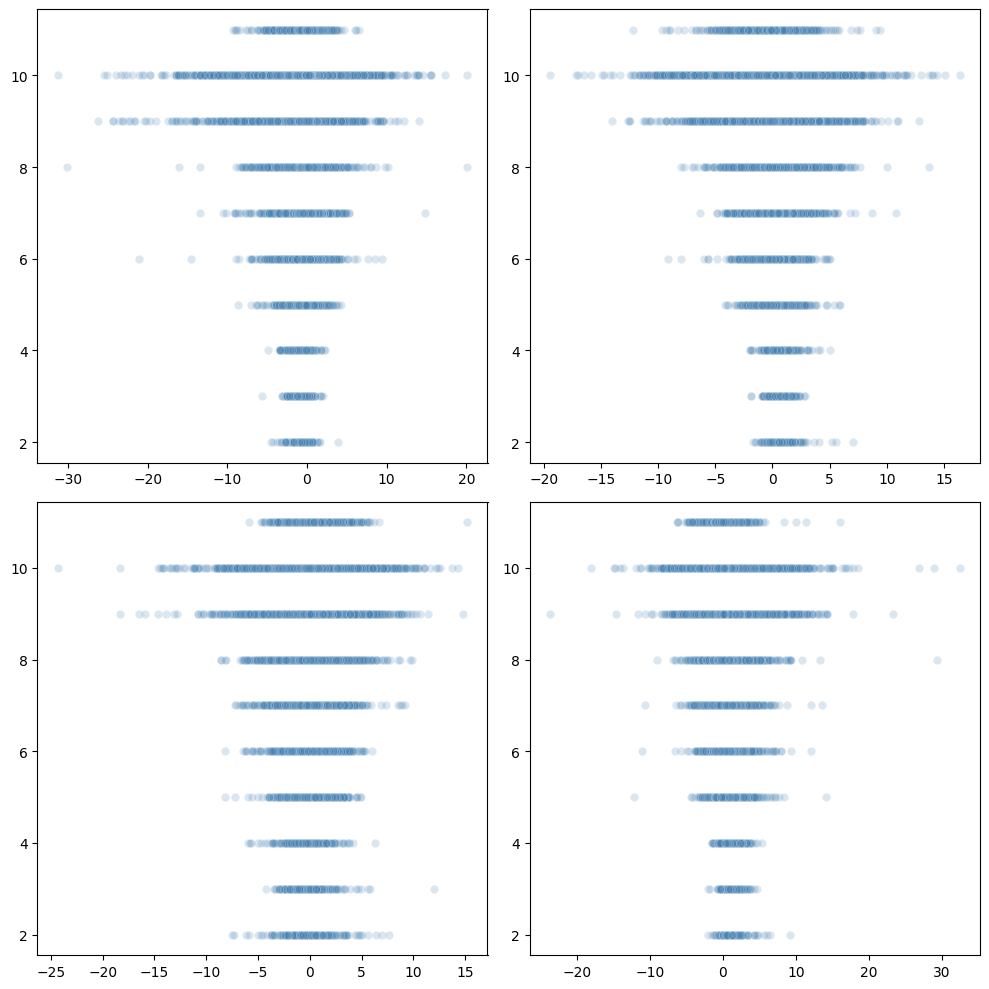

2 x 2


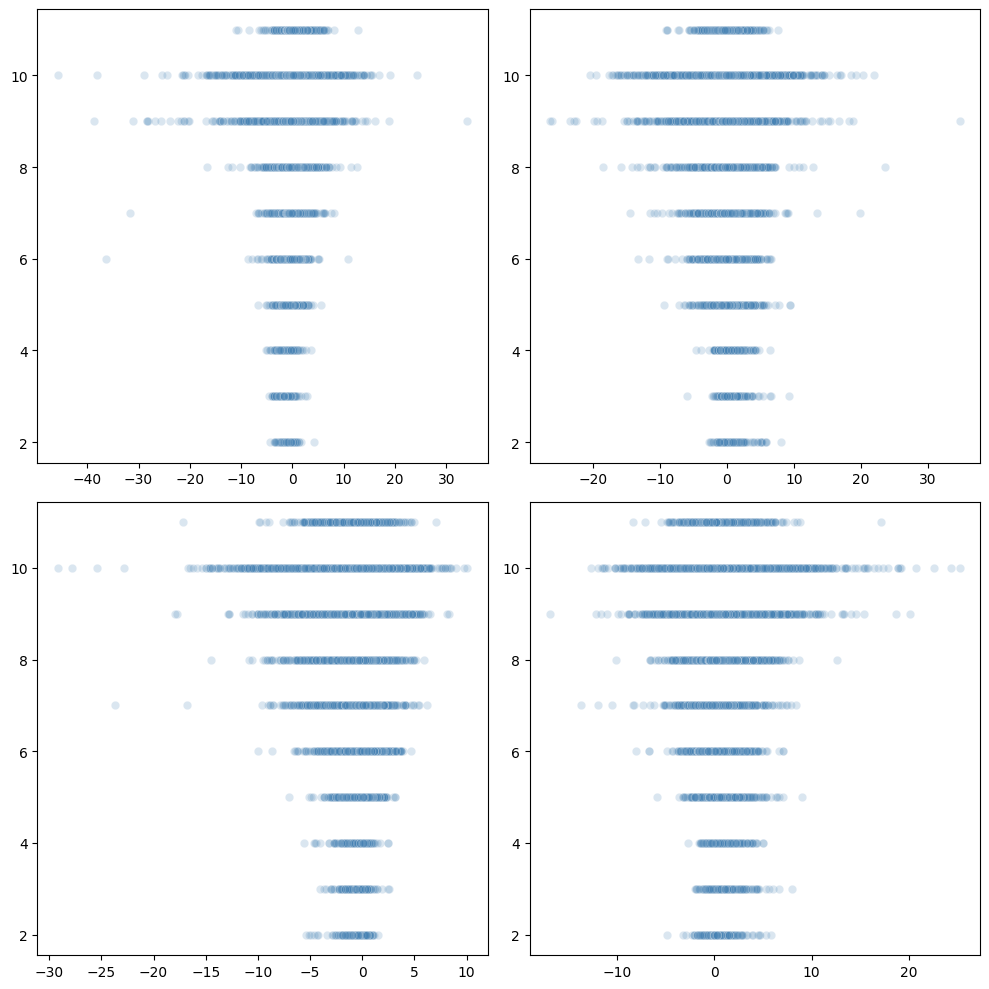

2 x 2


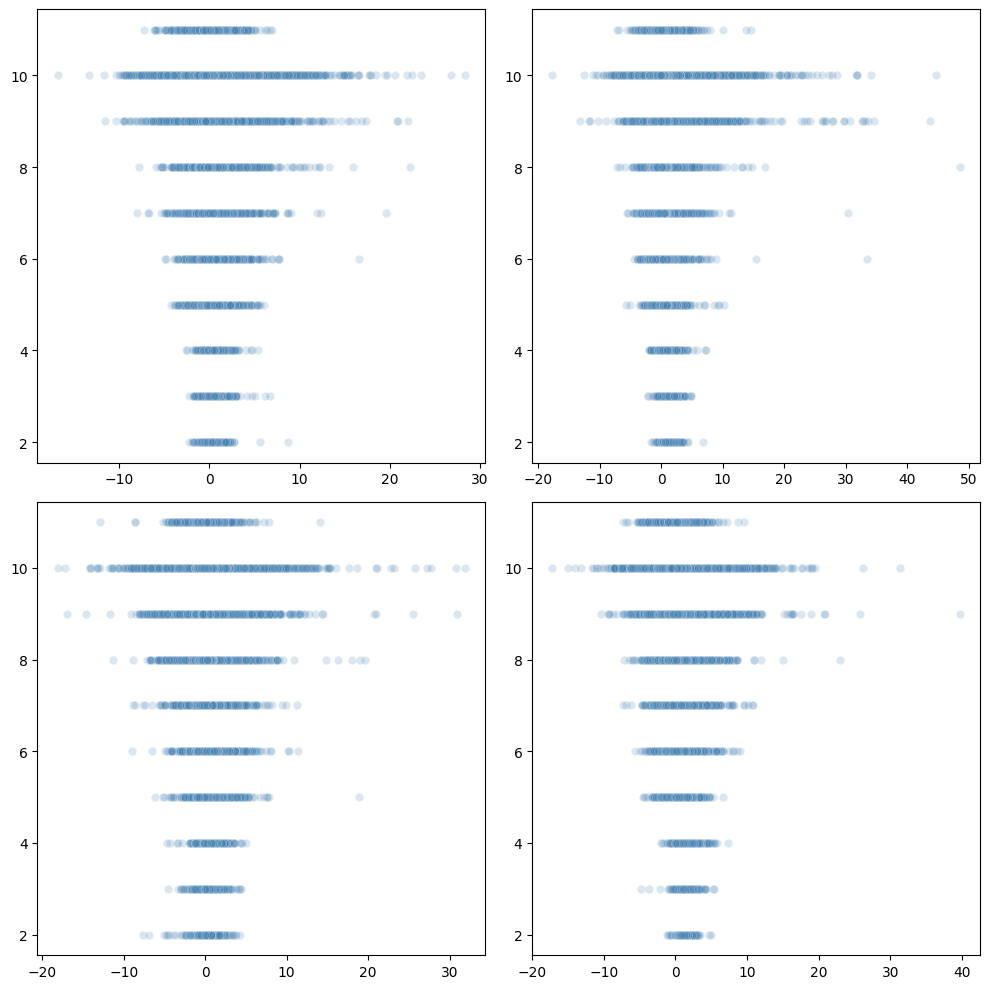

2 x 2


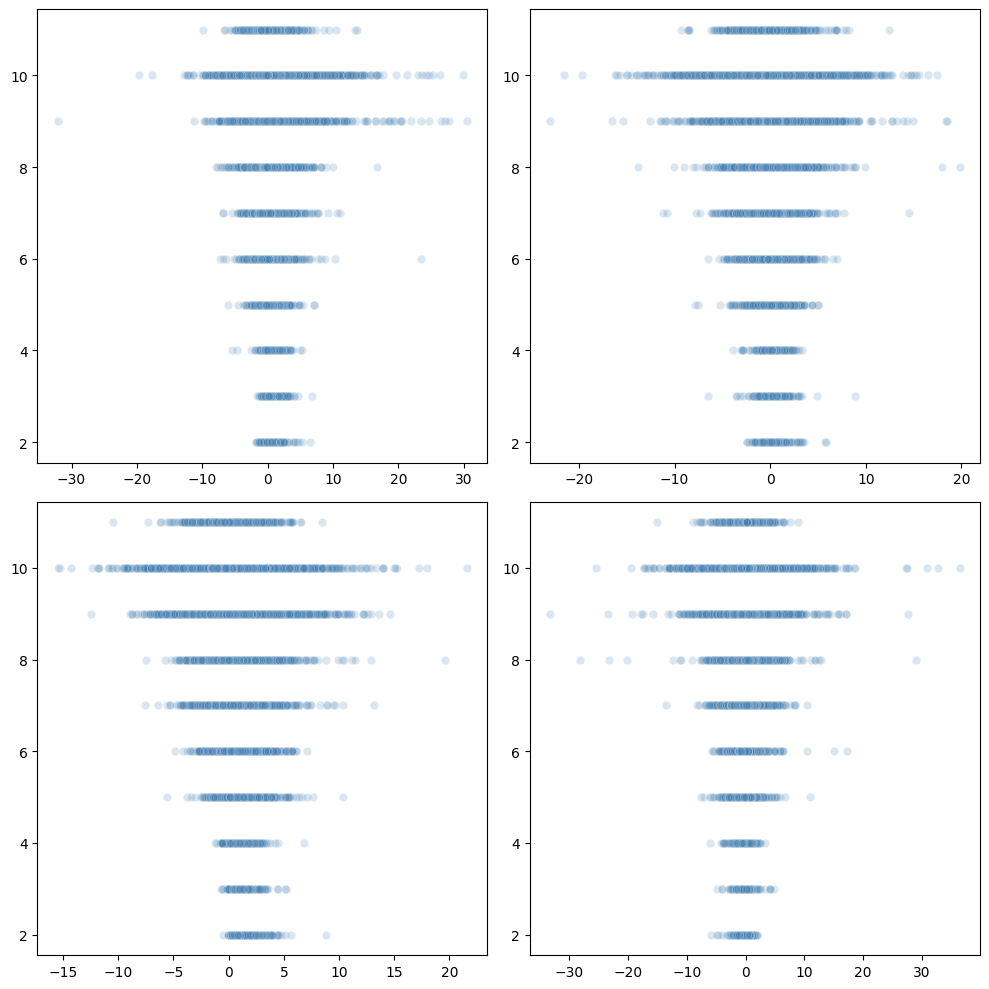

2 x 2


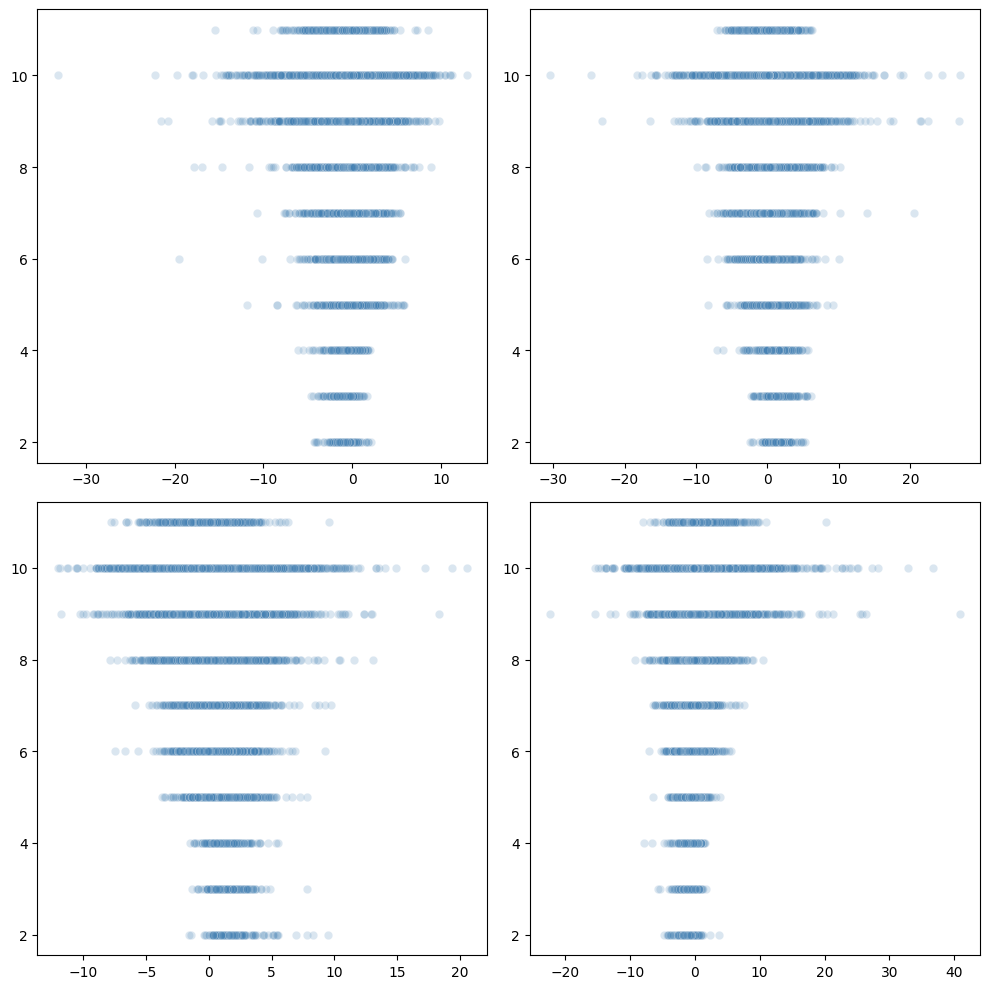

2 x 2


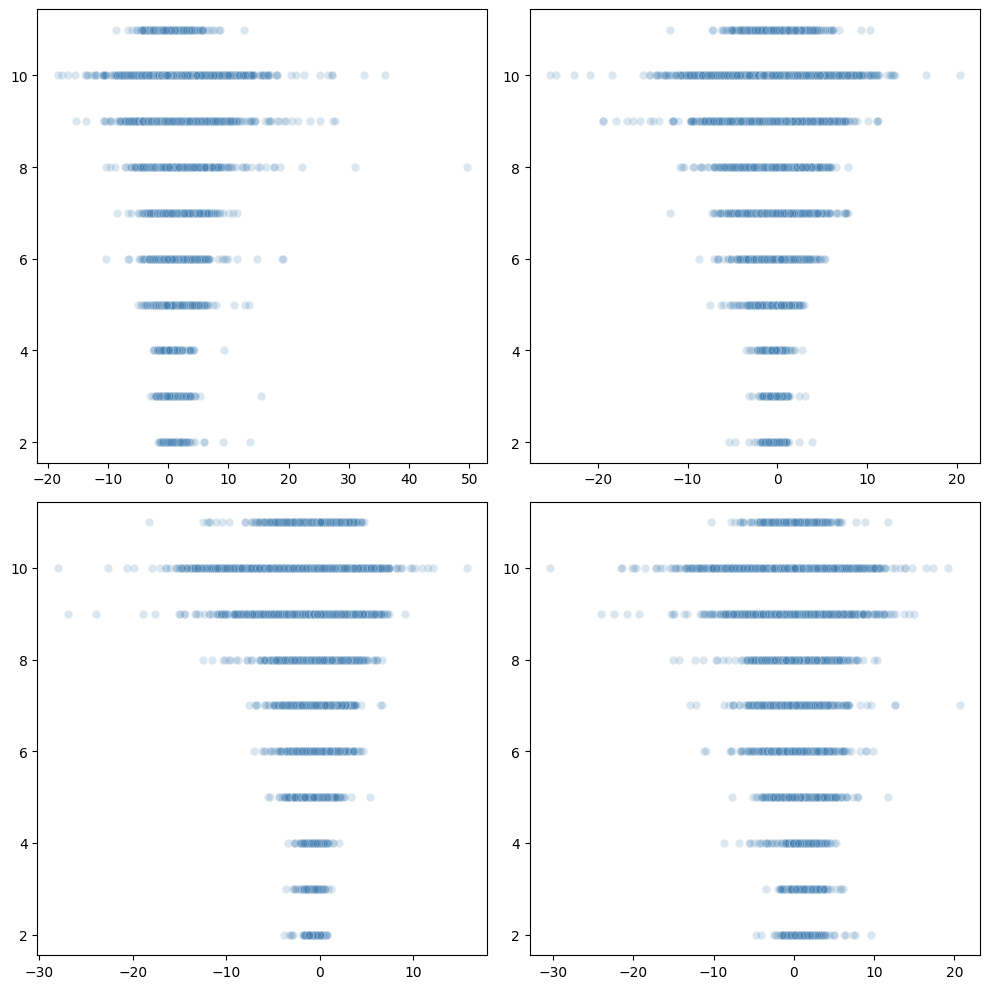

2 x 2


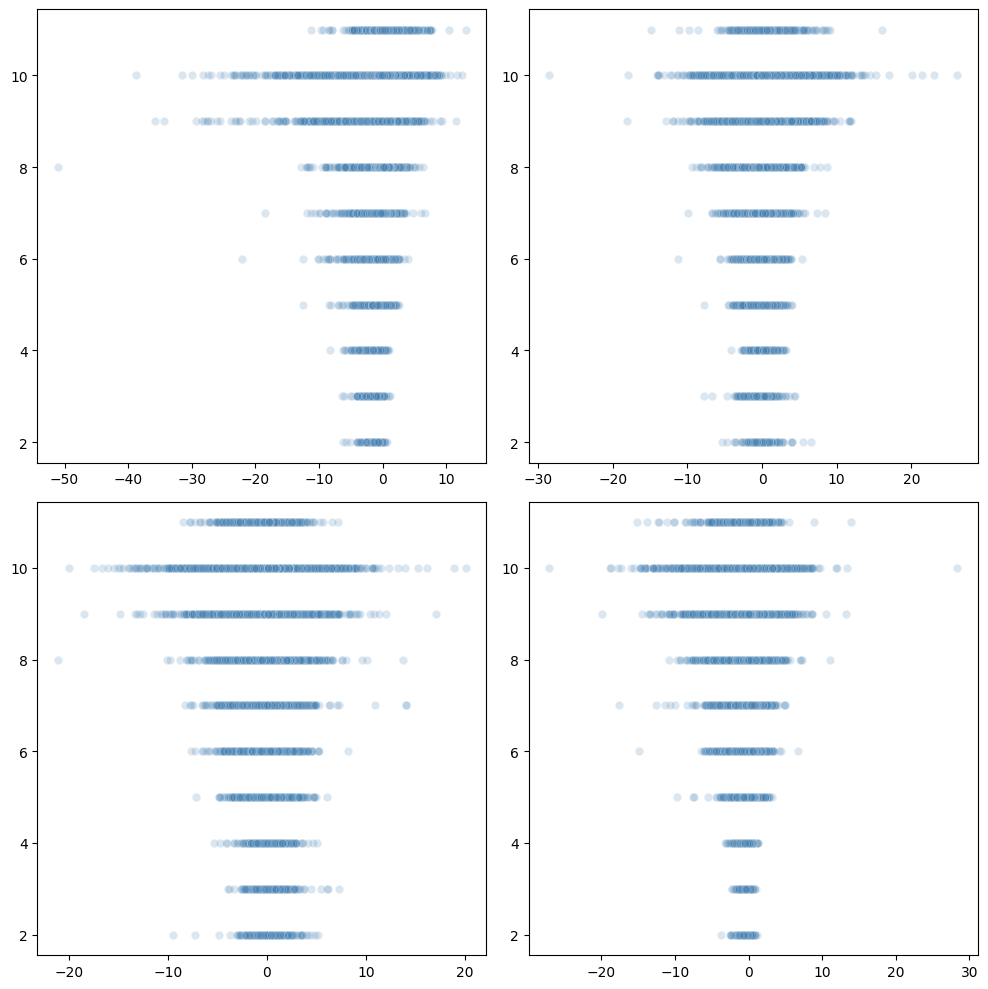

2 x 2


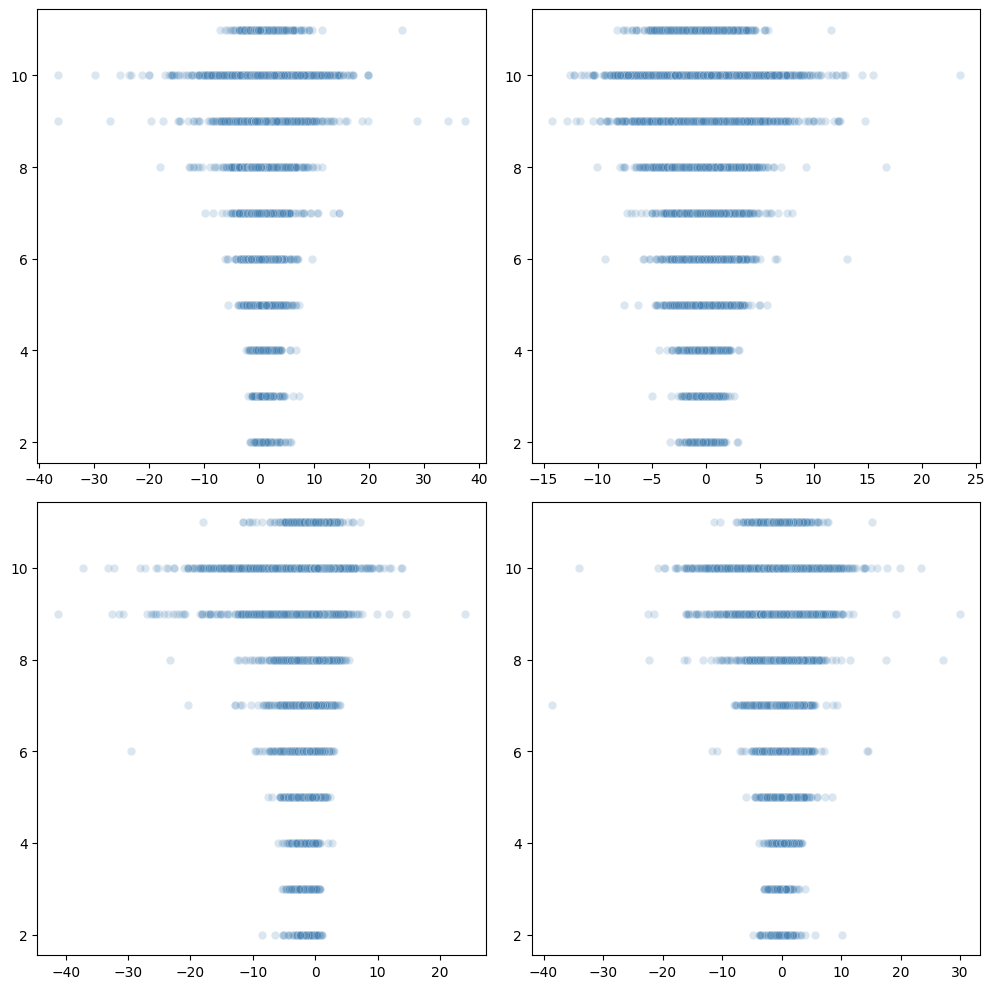

2 x 2


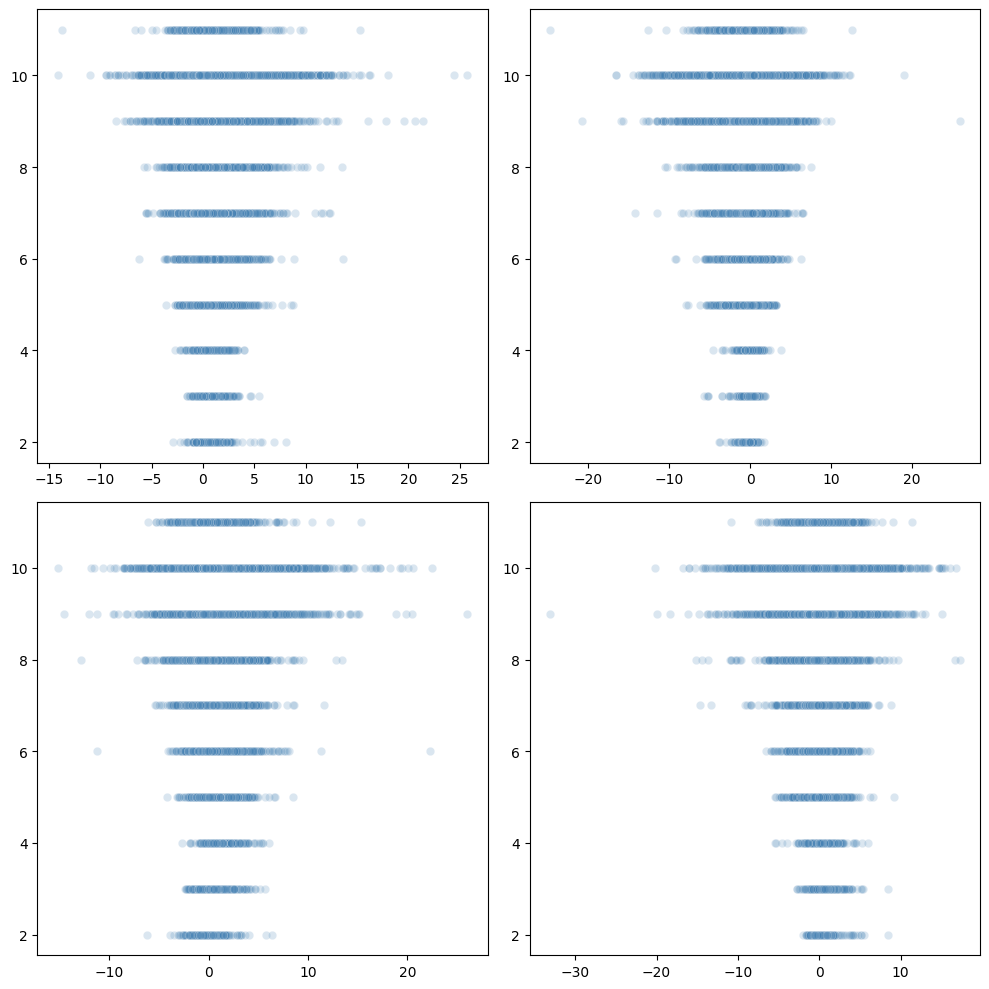

2 x 2


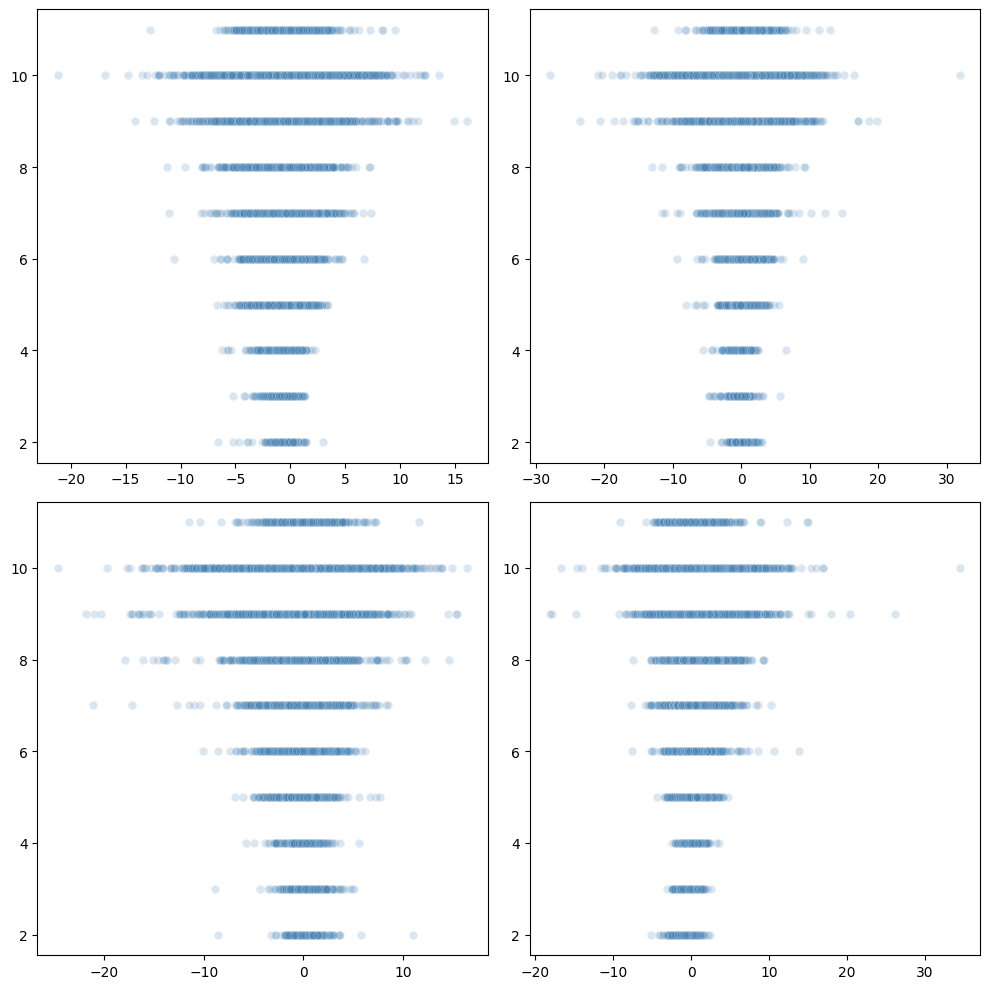

2 x 2


IndexError: index 90 is out of bounds for axis 0 with size 90

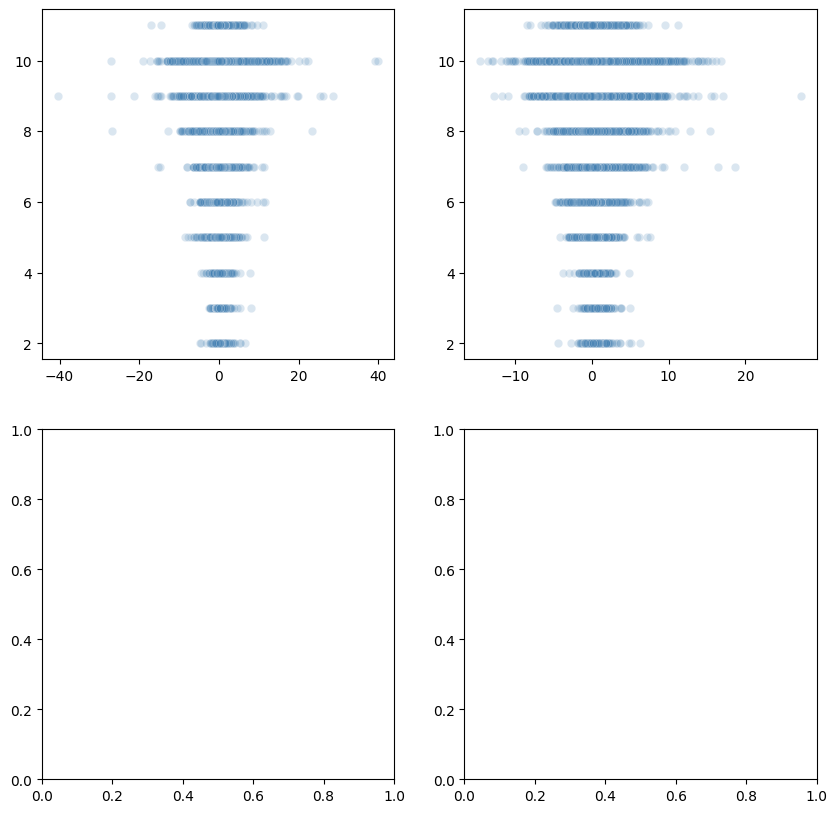

In [19]:
i = 0
while i<len(X_train[0]):
    plot_target_dependance(X_train, decade, start=i, end=i+4)
    i+=4

In [30]:
full = np.hstack((X_train, decade.reshape(len(decade),1)))
df = pd.DataFrame(full)
cov_mat = df.corr()

In [38]:
decade_correlation = np.corrcoef(x = full, rowvar = False)[len(cov_mat)-1]
decade_correlation = np.sort(decade_correlation)
decade_correlation

array([-0.18042258, -0.13590505, -0.11944865, -0.11918806, -0.09931716,
       -0.09665567, -0.09547652, -0.09373707, -0.09298747, -0.09136829,
       -0.08786782, -0.08580416, -0.08319419, -0.0704791 , -0.06518483,
       -0.06469726, -0.05706399, -0.05587715, -0.05524354, -0.05435365,
       -0.0541081 , -0.05194758, -0.05002002, -0.04952338, -0.04892696,
       -0.04529997, -0.0400741 , -0.03950961, -0.03729022, -0.03604388,
       -0.03526475, -0.03456497, -0.03223765, -0.02928834, -0.02489853,
       -0.02159967, -0.01887852, -0.01852712, -0.01244479, -0.00931662,
       -0.00574952, -0.00541227, -0.00516146, -0.00359592, -0.00344729,
       -0.00135571, -0.0013053 ,  0.0058498 ,  0.00645766,  0.00939317,
        0.01001003,  0.01085169,  0.01087274,  0.01152756,  0.01160451,
        0.0117925 ,  0.01332322,  0.01409401,  0.01502849,  0.01872973,
        0.02206816,  0.02222098,  0.02439219,  0.02470863,  0.02665893,
        0.02689753,  0.02810182,  0.02892002,  0.0291848 ,  0.02

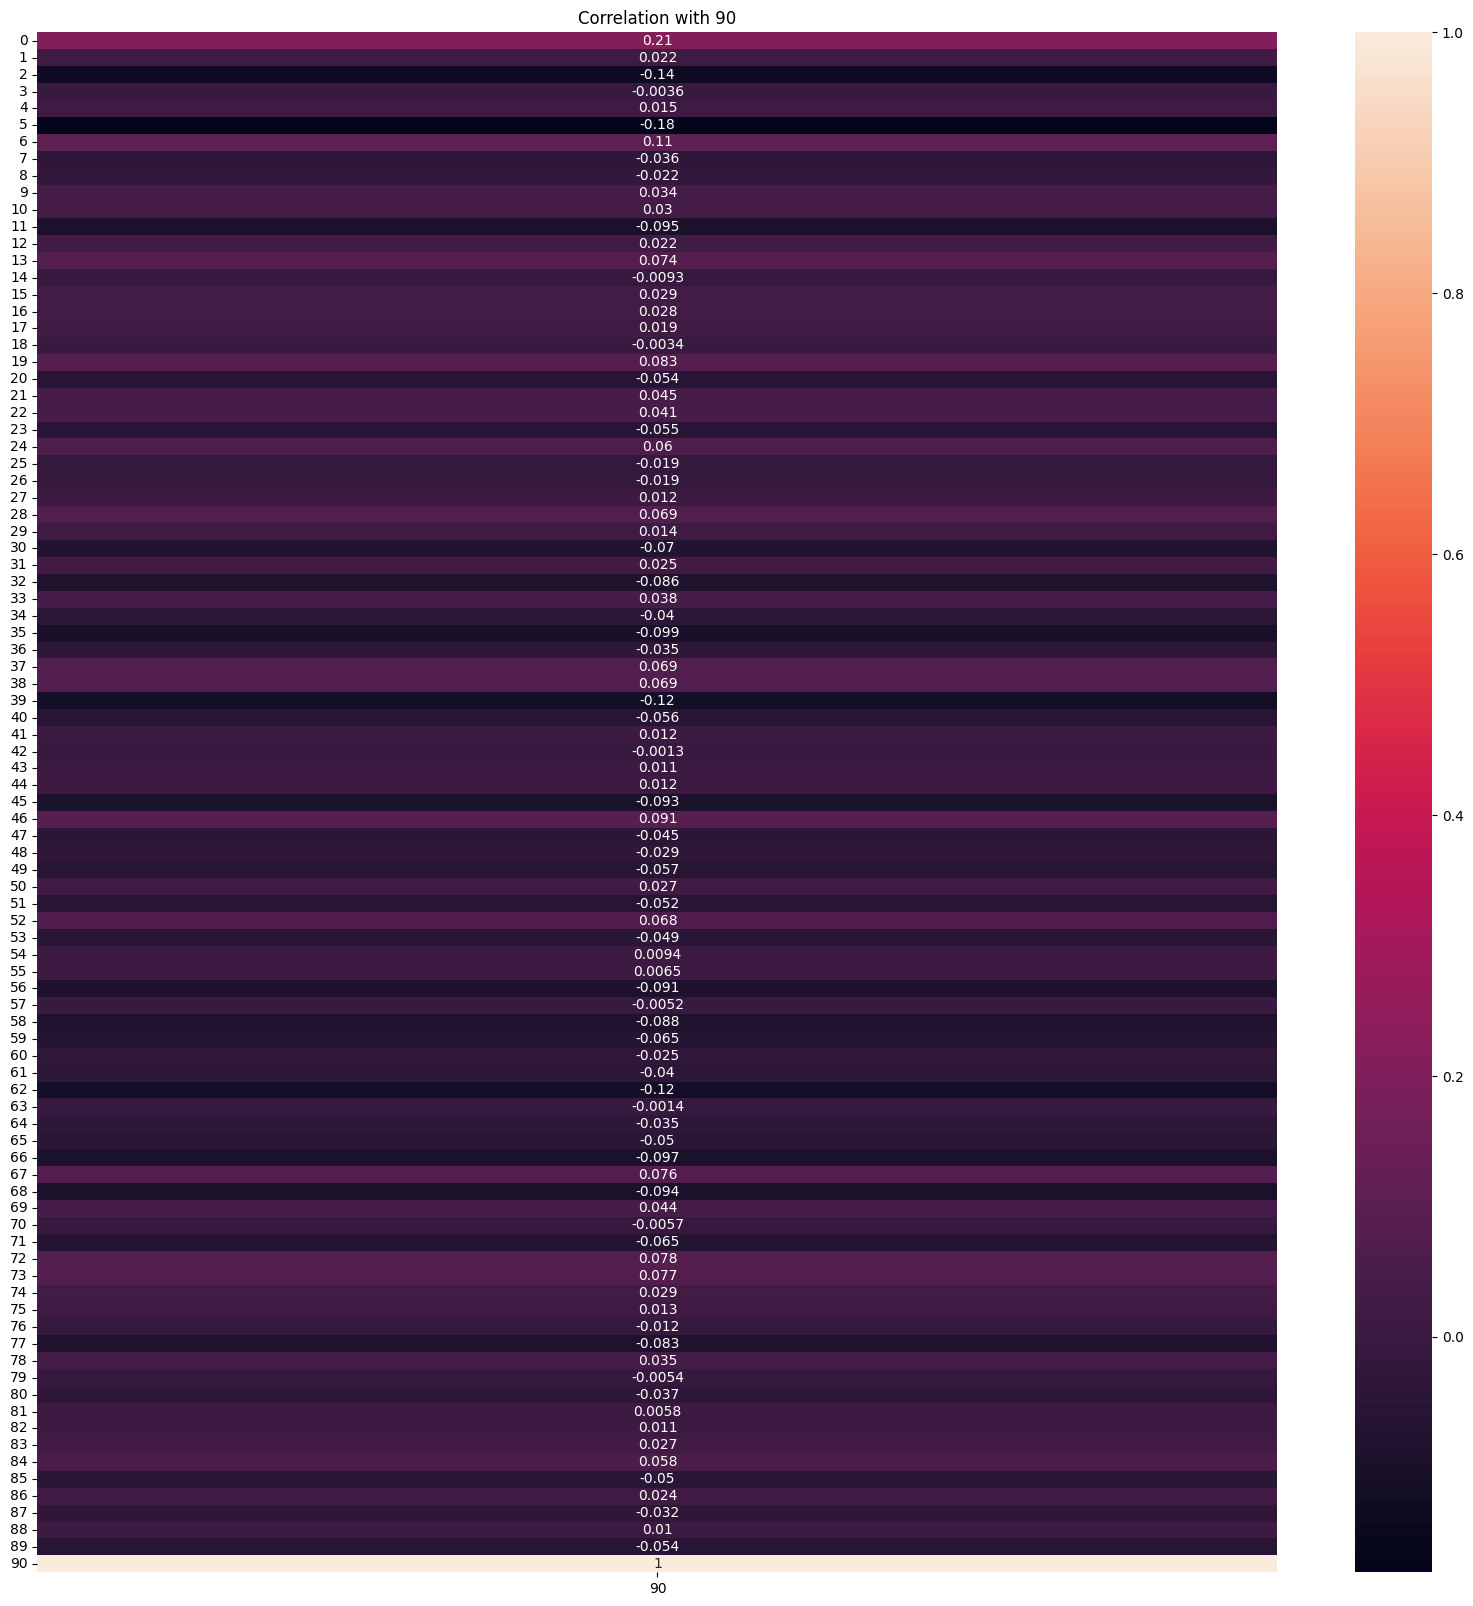

In [36]:
last_variable = cov_mat.columns[-1]
last_row_column = cov_mat[last_variable]
plt.figure(figsize=(20, 20))
sns.heatmap(last_row_column.to_frame(), annot=True)
plt.title(f"Correlation with {last_variable}")
plt.show()

# Clean + Scale

# Upsampling

# Dimensionality Reduction + Feature Importance

# Prediction

# Test